In [4]:
from Neuron import *
from Layers import *
from trainers import *
from data_preps import *
import matplotlib.pyplot as plt
import numpy as np

Label = 4


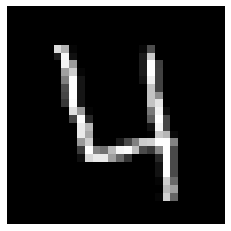

In [9]:
import pandas as pd
import os

def visualize_image(index=6):
    train_pd = pd.read_csv(os.path.join('digits', 'train.csv'))
    train_np = train_pd.to_numpy()
    train_X = train_np.T[1:].T
    train_y = train_np.T[0].T
    plt.imshow(train_X[index].reshape(28,28), cmap='gray')
    plt.axis('off')
    print(f'Label = {train_y[index]}')
    return train_X, train_y

class MNISTDataset:
    def __init__(self, X, y=None):
        self.X =X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]


def data_preparation(train_X, train_y, denominator=5):
    split = len(train_X)//denominator
    train_data = MNISTDataset(train_X[:-split], y=train_y[:-split])
                        
    test_data = MNISTDataset(train_X[-split:], y=train_y[-split:])
    return train_data, test_data


data_X, data_y = visualize_image()

train_data, test_data = data_preparation(data_X, data_y)

In [6]:
iter_num = 30
pics = [0,1,3,6,7,8,10,11,16,21]
#pics = [0,1]

lr = .1
alpha = 2

out_layer = Output_layer(num_exc=len(pics), learning_rate = lr, assymetry=alpha)
in_layer = Input_layer(out_layer, num_exc=28*28, learning_rate=lr, g=.5, assymetry=alpha, update_weights=True)
in_layer.make_connections()

for iter in range(iter_num):
    for p in pics:
        signal = train_data[p][0] * .06
        target = train_data[p][1]
        two_layers_trainer(signal, in_layer,  out_layer, target, power=9, time=70)
    print(f'epoch {iter} completed')

epoch 0 completed
epoch 1 completed
epoch 2 completed
epoch 3 completed
epoch 4 completed
epoch 5 completed
epoch 6 completed
epoch 7 completed
epoch 8 completed
epoch 9 completed
epoch 10 completed
epoch 11 completed
epoch 12 completed
epoch 13 completed
epoch 14 completed
epoch 15 completed
epoch 16 completed
epoch 17 completed
epoch 18 completed
epoch 19 completed
epoch 20 completed
epoch 21 completed
epoch 22 completed
epoch 23 completed
epoch 24 completed
epoch 25 completed
epoch 26 completed
epoch 27 completed
epoch 28 completed
epoch 29 completed


In [6]:
in_layer.save_weights()

In [4]:
iter_num = 20
pics = [0,1,3,6,7,8,10,11,16,21]
#pics = [0,1]

lr = .1
alpha = 2

out_layer = Output_layer(num_exc=len(pics), learning_rate = lr, assymetry=alpha)
in_layer = Input_layer(out_layer, num_exc=28*28, learning_rate=lr, g=.5, assymetry=alpha, update_weights=True)
in_layer.make_connections()

in_layer.load_weights()

In [7]:
in_layer.weight_dynamics(turn_on=False)
out_layer.drop_impulse()
gts = []
preds = []
for i in pics:
    for j in range(100):
        in_layer.drop_impulse()
        in_layer.transmit_current()
        out_layer.drop_impulse()
        _ = out_layer.simulation()
    signal = train_data[i][0]
    gt = train_data[i][1]
    pred = prediction(signal, [in_layer, out_layer], duration=150, build_plots=False)
    print(pred)
    gts.append(gt)
    preds.append(pred)
gts = np.array(gts)
preds = np.array(preds)
correct_samples = np.sum(preds == gts)
accuracy = correct_samples / 10
print(accuracy)


2
0
4
2
3
5
8
2
2
6
0.7


2
0
4
7
3
5
8
9
2
6
0.9

In [ ]:
in_layer.weight_dynamics(turn_on=False)

signal = train_data[0][0]
in_layer.accept_signal(signal)
out_layer.drop_impulse()

time = 100
vo0 = []
vo1 = []
io0 = []
io1 = []

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    _ = out_layer.simulation(1, 0)
    vo0.append(out_layer[0].v)
    vo1.append(out_layer[1].v)
    io0.append(out_layer[0].impulse)
    io1.append(out_layer[1].impulse)
    out_layer.drop_impulse()

signal = train_data[1][0]
in_layer.accept_signal(signal)

time = 100

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    _ = out_layer.simulation(1, 0)
    vo0.append(out_layer[0].v)
    vo1.append(out_layer[1].v)
    io0.append(out_layer[0].impulse)
    io1.append(out_layer[1].impulse)
    out_layer.drop_impulse()

x = np.arange(len(vo0)) * .1

In [ ]:
plt.figure()
plt.plot(x, vo0)
plt.plot(x, vo1)
plt.figure()
plt.plot(x, io0)
plt.plot(x, io1)
plt.show()

In [ ]:
lr = .1
alpha = 2
signal = [0, 10]
out_layer = Output_layer(num_exc=2, learning_rate = lr, assymetry=alpha)
in_layer = Input_layer(out_layer, num_exc=len(signal), learning_rate=lr, g=280, assymetry=alpha, update_weights=True)
in_layer.make_connections()

target = 0

two_layers_trainer(signal, in_layer, out_layer, target, power=9, time=10000)

In [ ]:
np.random.seed(42)
lr = .001
alpha = 2
signal = [0, 10]
out_layer = Output_layer(num_exc=2, learning_rate = lr, assymetry=alpha, update_weights=False)
in_layer = Input_layer(out_layer, num_exc=len(signal), learning_rate=lr, g=280, assymetry=alpha, update_weights=True)
in_layer.make_connections()
in_layer.accept_signal(signal)

target = 0
time = 100
delay = 5

vi1 = []
vi0 = []
ii1 = []
ii0 = []
vo0 = []
vo1 = []
io0 = []
io1 = []
w00 = []
w10 = []
w01 = []
w11 = []

out_layer[1].I = 1000

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    #out_layer[1].I = -100
    _ = out_layer.simulation(target, 5)
    vi0.append(in_layer[0].v)
    vi1.append(in_layer[1].v)
    ii0.append(in_layer[0].impulse)
    ii1.append(in_layer[1].impulse)
    vo0.append(out_layer[0].v)
    vo1.append(out_layer[1].v)
    io0.append(out_layer[0].impulse)
    io1.append(out_layer[1].impulse)
    w00.append(in_layer[0].connections[0])
    w01.append(in_layer[0].connections[1])
    w10.append(in_layer[1].connections[0])
    w11.append(in_layer[1].connections[1])
    out_layer.drop_impulse()
    
in_layer.weight_dynamics(turn_on=False)

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    #out_layer[1].I = -100
    _ = out_layer.simulation(1, 0)
    vi0.append(in_layer[0].v)
    vi1.append(in_layer[1].v)
    ii0.append(in_layer[0].impulse)
    ii1.append(in_layer[1].impulse)
    vo0.append(out_layer[0].v)
    vo1.append(out_layer[1].v)
    io0.append(out_layer[0].impulse)
    io1.append(out_layer[1].impulse)
    w00.append(in_layer[0].connections[0])
    w01.append(in_layer[0].connections[1])
    w10.append(in_layer[1].connections[0])
    w11.append(in_layer[1].connections[1])
    out_layer.drop_impulse()

x = np.arange(len(vo0)) * .1
    

In [ ]:
plt.figure()
plt.plot(x, vi0)
plt.plot(x, vi1)
plt.plot(x, vo0)
plt.plot(x, vo1)
plt.figure()
plt.plot(x, ii0)
plt.plot(x, ii1)
plt.plot(x, io0)
plt.plot(x, io1)
plt.figure()
plt.plot(x, w00)
plt.plot(x, w01)
plt.plot(x, w10)
plt.plot(x, w11)
plt.show()


In [ ]:
np.random.seed(42)
signal = [10]
out_layer = Output_layer(num_exc=1, learning_rate=.1)
in_layer = Input_layer(out_layer, num_exc=len(signal), learning_rate=.1, g=80)
in_layer.make_connections()
in_layer.accept_signal(signal)

target = 0
time = 10000
impulse_out = []
voltage_out = []
impulse_in = []
voltage_in = []
w = []
out_layer[0].I = 1000


for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    impulse, voltage = out_layer.simulation(target, 0)
    impulse_out.append(out_layer[target].impulse)
    voltage_out.append(voltage[target])
    impulse_in.append(in_layer[0].impulse)
    voltage_in.append(in_layer[0].v)
    w.append(in_layer[0].connections[0])
    out_layer.drop_impulse()

x_axis = np.arange(len(impulse_out)) * .1

In [ ]:
plt.figure()
plt.plot(x_axis, voltage_in)
plt.plot(x_axis, voltage_out)
plt.figure()
plt.plot(x_axis, impulse_in)
plt.plot(x_axis, impulse_out)
plt.figure()
plt.plot(x_axis, w)
plt.show()

In [ ]:
in_neu = IzhikevichNeuron(g=110)
out_neu = IzhikevichNeuron()
time = 100
in_neu.I = 10
in_impulse_hist = []
in_voltage_hist = []
out_impulse_hist = []
out_voltage_hist = []
for i in range(int(time//.1)+1):
    in_impulse, in_voltage = in_neu.behave()
    out_neu.apply_current(in_impulse)
    out_impulse, out_voltage = out_neu.behave()
    in_impulse_hist.append(in_impulse)
    in_voltage_hist.append(in_voltage)
    out_impulse_hist.append(out_impulse)
    out_voltage_hist.append(out_voltage)

x_axis = np.arange(len(in_impulse_hist)) * .1
fig = plt.figure()
plt.plot(x_axis, in_voltage_hist)
plt.plot(x_axis,out_voltage_hist)
plt.show()
fig = plt.figure()
plt.plot(x_axis,in_impulse_hist)
plt.plot(x_axis,out_impulse_hist)
plt.show()


In [ ]:
lr=1e-3
signal = np.array([5,6,7,8])*2
out_layer = Output_layer(num_exc=1, learning_rate=lr)
in_layer = Input_layer(out_layer, num_exc=len(signal), learning_rate=lr)
in_layer.make_connections()
in_layer.accept_signal(signal)

target=0
time = 1000
voltin = []
imin = []
voltout = []
imout = []

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    impulse, voltage = out_layer.simulation(target, 0)
    voltin.append(in_layer[-1].v)
    imin.append(in_layer[-1].impulse)
    voltout.append(voltage)
    imout.append(out_layer[0].impulse)
    out_layer.drop_impulse()

x_axis = np.arange(len(imout)) * .1
fig = plt.figure()
plt.plot(x_axis, voltin)
plt.plot(x_axis, voltout)
plt.show()
plt.plot(x_axis, imin)
plt.plot(x_axis, imout)
plt.show()

In [ ]:
np.random.seed(42)
signal = np.arange(100)*.1
out_layer = Output_layer(num_exc=2, learning_rate=.1)
hid = Hidden_layer(out_layer, num_exc=100, learning_rate=.1, g=10)
hid.make_connections()
in_layer = Input_layer(hid, num_exc=len(signal), learning_rate=.1, g=10)
in_layer.make_connections()

in_layer.accept_signal(signal)

target = 0
time = 100
impulse_out = []
voltage_out = []
imout1 = []
volout1 = []
impulse_hid = []
voltage_hid = []
impulse_in = []
voltage_in = []
who0 = []
who1 = []
wih0 = []
wihlast = []

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    hid.transmit_current()
    impulse, voltage = out_layer.simulation(target, 10)
    impulse_out.append(impulse[target])
    voltage_out.append(voltage[target])
    imout1.append(impulse[1])
    volout1.append(voltage[1])
    impulse_hid.append(hid[0].I)
    voltage_hid.append(hid[0].v)
    impulse_in.append(in_layer[50].I)
    voltage_in.append(in_layer[50].v)
    who0.append(hid[0].connections[0])
    who1.append(hid[0].connections[1])
    wih0.append(in_layer[0].connections[10])
    wihlast.append(in_layer[-1].connections[10])
    hid.drop_impulse()
    out_layer.drop_impulse()




In [ ]:
x_axis = np.arange(len(impulse_out)) * .1
fig = plt.figure()
plt.plot(x_axis, voltage_out)
plt.plot(x_axis, volout1)
fig = plt.figure()
plt.plot(x_axis, impulse_out)
plt.plot(x_axis, imout1)
fig = plt.figure()
plt.plot(x_axis, voltage_hid)
plt.plot(x_axis, voltage_in)
fig = plt.figure()
plt.plot(x_axis, who0)
plt.plot(x_axis, who1)
fig = plt.figure()
plt.plot(x_axis, wih0)
plt.plot(x_axis, wihlast)
plt.show()

In [ ]:
np.random.seed(42)
signal = np.arange(28*28)*.05
out_layer = Output_layer(num_exc=2, learning_rate=.001)
in_layer = Input_layer(out_layer, num_exc=len(signal), learning_rate=.001, g=2)
in_layer.make_connections()
connections, objects = in_layer[0].params()
in_layer.accept_signal(signal)

target = 0

time = 30
impulse_history = []
voltage_history = []
impulse9 = []
voltage9 = []
w1_hist = []
w9_hist = []

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    impulse, voltage = out_layer.simulation(target, 0)
    impulse_history.append(impulse[target])
    voltage_history.append(voltage[target])
    impulse9.append(impulse[1])
    voltage9.append(in_layer[9].v)
    w1_hist.append(in_layer[1].connections[target])
    w9_hist.append(in_layer[9].connections[target])
    out_layer.drop_impulse()

x_axis = np.arange(len(impulse_history)) * .1
fig = plt.figure()
plt.plot(x_axis, voltage_history)
plt.plot(x_axis, voltage9)
fig = plt.figure()
plt.plot(x_axis, impulse_history)
plt.plot(x_axis, impulse9)
fig = plt.figure()
plt.plot(x_axis, w1_hist)
plt.plot(x_axis, w9_hist)
plt.show()

print(in_layer[0].params())